In [2]:
%cd ..

/home/rehak/repos/ops/ecris.analysis


In [ ]:
from pathlib import Path
from ops.ecris.analysis.io import read_csd_from_file_pair
from scipy.signal import find_peaks
from itertools import permutations
import numpy as np
import matplotlib.pyplot as plt
from ops.ecris.analysis.csd.m_over_q import estimate_m_over_q
import joblib
import random

pipeline = joblib.load('models/oxygen_nn/mlp_csd_oxygen.pkl')

def sorted_permutations(to_permute):
    return [list(p) for p in permutations(to_permute, r=7) if list(p) == sorted(p)] 

def estimate_correct_peaks(csd):
    all_peaks, properties = find_peaks(csd.beam_current, prominence=0.1, distance=50, height=(1, None))
    sorted_peaks = np.flip(np.argsort(properties['prominences']))
    highest_peaks = sorted(all_peaks[sorted_peaks][:25])
    sorted_peaks = sorted_permutations([int(v) for v in highest_peaks])
    return sorted_peaks, pipeline.predict_proba(sorted_peaks)[:, 1]

CSD_FILEPATHS = list(Path('./data/csds').glob('csd_*'))
CSD_FILEPATHS = list(Path('./data/csds').glob('csd_*'))
# FILE_NUM = random.randint(0, len(CSD_FILEPATHS))
FILE_NUM=780
csd = read_csd_from_file_pair(CSD_FILEPATHS[FILE_NUM])
estimated_peaks, probabilities = estimate_correct_peaks(csd)
highest_prob = np.flip(np.argsort(probabilities))[0]
csd.m_over_q = estimate_m_over_q(csd)

Iteration n_peaks=10 prominance=np.float64(0.1) distance=np.float64(1.0)
Iteration n_peaks=10 prominance=np.float64(0.1) distance=np.float64(6.2105263157894735)
Iteration n_peaks=10 prominance=np.float64(0.1) distance=np.float64(11.421052631578947)
Iteration n_peaks=10 prominance=np.float64(0.1) distance=np.float64(16.63157894736842)
Iteration n_peaks=10 prominance=np.float64(0.1) distance=np.float64(21.842105263157894)
Iteration n_peaks=10 prominance=np.float64(0.1) distance=np.float64(27.052631578947366)
Iteration n_peaks=10 prominance=np.float64(0.1) distance=np.float64(32.26315789473684)
Iteration n_peaks=10 prominance=np.float64(0.1) distance=np.float64(37.473684210526315)
Iteration n_peaks=10 prominance=np.float64(0.1) distance=np.float64(42.68421052631579)
Iteration n_peaks=10 prominance=np.float64(0.1) distance=np.float64(47.89473684210526)
Iteration n_peaks=10 prominance=np.float64(0.1) distance=np.float64(53.10526315789473)
Iteration n_peaks=10 prominance=np.float64(0.1) dist

KeyboardInterrupt: 

In [114]:
FILE_NUM

780

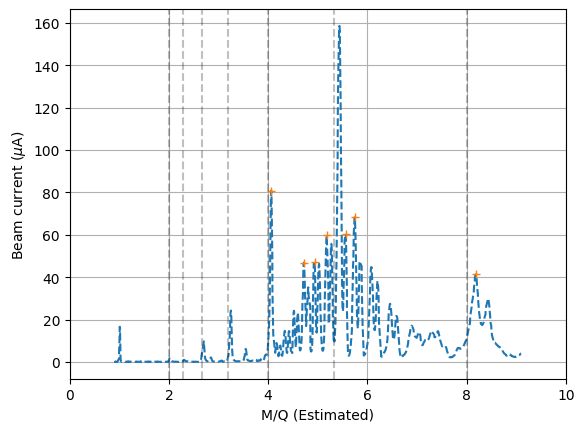

Estimated probability of O2 detection: 1.9136321526046515e-154


In [120]:
plt.plot(csd.m_over_q, csd.beam_current, '--')
highest_prob = np.flip(np.argsort(probabilities))[0]
highest_peaks = estimated_peaks[highest_prob]
plt.plot(csd.m_over_q[highest_peaks], csd.beam_current[highest_peaks], '+')
for i in range(1, 9):
    plt.axvline(16/i, ls='--', alpha=0.25, c='k')
plt.xlabel('M/Q (Estimated)')
plt.ylabel(r'Beam current ($\mu$A)')
plt.xlim([0,10])
# plt.xscale('log')
# plt.xlim([2, 5])
plt.grid()
plt.show()
print(f'Estimated probability of O2 detection: {probabilities[highest_prob]}')


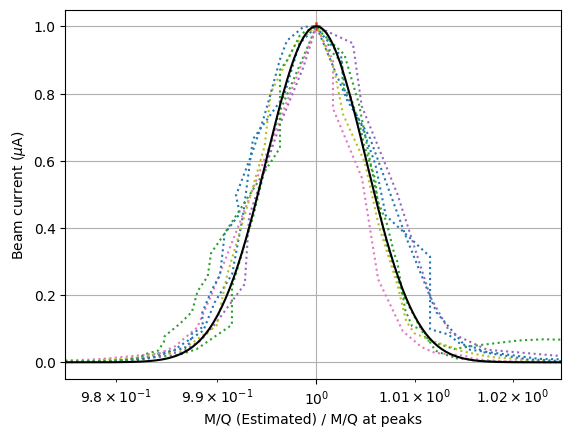

In [36]:
#plt.plot(csd.m_over_q, csd.beam_current, '--')
highest_peaks = estimated_peaks[highest_prob]
for h in highest_peaks:
    plt.plot(csd.m_over_q / csd.m_over_q[h], csd.beam_current / csd.beam_current[h],':')
    plt.plot(1, csd.beam_current[h] / csd.beam_current[h], '+')

XX = np.linspace(0.9, 1.1,num=1000)
g = 0.005
x = ((XX - 1) / g)
YY = np.exp(-0.5 * x**2)
plt.plot(XX,YY, 'k')

plt.xlabel('M/Q (Estimated) / M/Q at peaks')
plt.ylabel(r'Beam current ($\mu$A)')
# plt.xlim([0,10])
plt.xscale('log')
plt.xlim([0.975, 1.025])
plt.ylim(-0.05, 1.05)
plt.grid()
plt.show()